In [19]:
import numpy as np
import matplotlib.pyplot as plt

Machine Learning Essentials \
WS 2025 \
Nuno Costa & Felix Brunner

# Exercise Session 3 - Probability Theory

This notebook will walk you through a few examples regarding basic probability theory. You will also find a few examples to work through on your own. Solutions will also be discussed in the exercise session on 31.10.25.

## Quick Summary

For ease of reference, here are some of the key axioms and equations of probability theory.

Probability Axioms (also called Kolmogorov Axioms):
- Non-negativity axiom: All probabilities can be written as non-negative real numbers.

- Normalization axiom: The probability of the entire sample space is equal to 1. (E.g. for a normal die, this would mean that we are guaranteed to get *some* number from 1 to 6: $P(X \in [1,6]) = 1$)

- Additivity axiom: We may add the probabilities of mutually exclusive events to get the proability that one of them occurs. (E.g. for the die: $P(X \in {1,2}) = P(X=1) + P(X=2))$

Combining the first two axioms, we can also deduce: 
$$
0 \leq P(X=x) \leq 1
$$
$$
\sum_{x} P(X=x) = 1
$$

Additionally, we can identify the following rules (for discrete random variables).

- Sum Rule

$$
p(y) = \sum_{x} p(y,x)
$$

- Joint probability of independent events

$$
p(z_1, \dots, z_O) = \prod_k p(z_k)
$$

- Product Rule

$$
p(x,y) = p(y|x) \; p(x)=p(x|y) \; p(y)
$$

The last of which leads to *Bayes' Rule*

$$
p(y|x) = \frac{p(x|y) p(y)}{p(x)}
$$


### Example 1 - Basic Probabilities
[Adapted from https://doi.org/10.1007/978-3-658-45804-1]
The following information is known about a modified die.

|  Number |  1 |  2 |  3 |  4 |  5 | 6  |
|---|---|---|---|---|---|---|
| Probability  | $p_1$  | $\frac{1}{8}$  | $\frac{1}{4}$  | $\frac{1}{16}$  | $\frac{3}{8}$  |  $p_6$ |

Additionally we know that the chance to roll an odd number is equal to $p(\text{Odd}) = \frac{3}{4}$.

Tasks:

a) Calculate the unknown probabilities $p_1$ and $p_6$.

b) Calculate the expected value of rolling this die.

In [11]:
# Bayes Example
# [Adapted from https://tirthajyoti.github.io/Notebooks/Bayes_rule.html]

# We consider a drug test, which is 94% sensitive and 97% specific
# This means that it will give a true positive with 94% and a true negative with 97% probability
# About 0.7% of the populace use the drug

p_pos_user = 0.94
p_neg_non_user = 0.97
p_pos_non_user = 1 - p_neg_non_user
p_user = 0.007
p_non_user = 1-p_user

# Task: What is the probability that somebody with a positive test result is actually a user?


Using Bayes' Rule
$$
P(User|+) = \frac{P(+|\text{User}) P(\text{User})}{P(+)} = \frac{P(+|\text{User}) P(\text{User})}{P(+|\text{User})P(\text{User}) + P(+|\text{Non-user}) P(\text{Non-user})}
$$

In [12]:
# Overwrite the following variable with your solution
p_pos= p_pos_user * p_user + p_pos_non_user * p_non_user
p_user_pos = p_pos_user * p_user / p_pos
print(f"{p_user_pos:.3f}")

0.181


In [13]:
# Bayes Exercise
# Given the data from the previous example, we now conduct a second test (98% sensitive, 92% specific)
# The test is conducted on an individual with a positive first test and is also positive

p_pos2_user = 0.98
p_neg2_user = 1 - 0.92

# Task: What is the probability that the individual is a drug user?



This two-step application, now leads to a modified prior in the second test. Instead of having to assume that the probability of being a drug user is 0.7%, we can now already assume the higher probability calculated in the exercise above. We denote the result of the i-th test as $+^i$ or $-^i$.

$$
P(User|+^2) = \frac{P(+^2|User) P(User|+^1)}{P(+^2)} = \frac{P(+^2|User) P(User|+^1)}{P(+^2|User) P(User|+^1) + P(-^2|User) P(User|+^1)}
$$

In [18]:
# Overwrite the following variable with your solution
p_user_pos2 = .....
print(f"{p_user_pos2:.3f}")

SyntaxError: invalid syntax (24959163.py, line 2)

In [15]:
# Helper function to calculate the value of the gaussian normal distribution
def gaussian(x, mu, sigma):
    return 1.0 / (np.sqrt(2.0 * np.pi) * sigma) * np.exp(-np.power((x - mu) / sigma, 2.0) / 2)

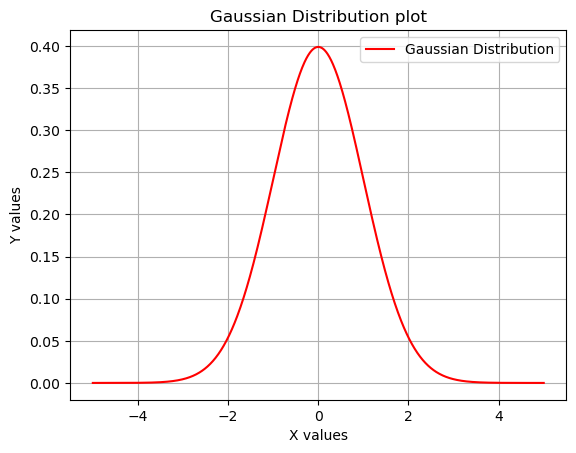

In [20]:
# Distribution Plots

x = np.linspace(-5,5,1000)
y = gaussian(x, 0, 1)

plt.plot(x, y, 'r', label='Gaussian Distribution')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Gaussian Distribution plot")
plt.grid(True)
plt.legend()


In [21]:
# We can also draw samples from various distributions
# To learn more, refer to https://numpy.org/doc/1.16/reference/routines.random.html

uniform_var = np.random.rand(10) # Draw 10 samples from uniform distribution
print(uniform_var)

normal_var = np.random.randn(10) # Draw 10 samples from uniform distribution
print(normal_var)

beta_var = np.random.beta(1.0, 1.0, 10) # Draw 10 samples from the beta distribution
print(beta_var)

[0.92890017 0.75885073 0.73827205 0.77400973 0.81401818 0.95901562
 0.77596006 0.54915122 0.05558045 0.0761069 ]
[-0.55727122 -1.60735105  0.07299048  0.32895722 -1.42356494 -0.42068135
 -1.21695413  0.30802898  0.87079975 -1.14372441]
[0.26633198 0.94156867 0.55495651 0.47061268 0.714184   0.48442653
 0.31181198 0.50697414 0.71033007 0.12304553]


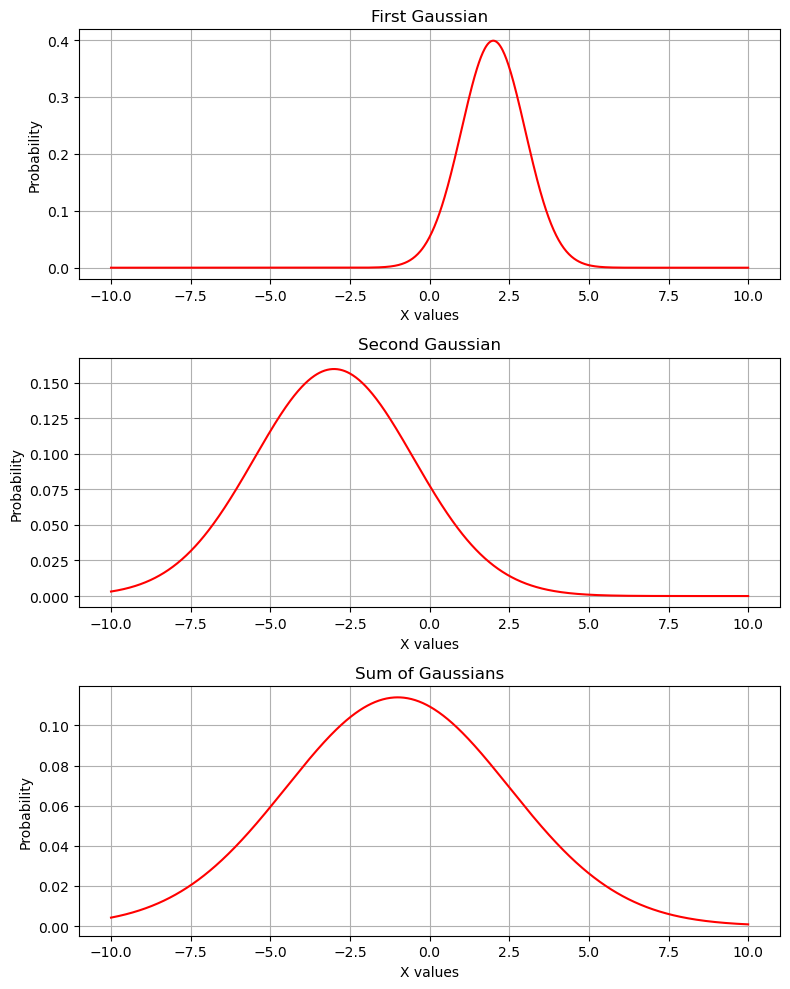

In [23]:
# Addition and Multiplication of Gaussian Distributions Exercise
# In this exercise your task is to look at the result of combining two gaussian distributions.
# You have two independent random variables, which are distributed according to the following distributions:
#
# Gaussian Random Variable 1: mu=2, sigma=1
mu1 = 2
sigma1 = 1
# Gaussian Random Variable 2: mu=-3, sigma=2.5
mu2 = -3
sigma2 = 2.5
#
# Calculate and plot the following:
# - The pdf of each random variable.
# - The pdf of the sum of the two random variables.
# Note what you observe.
# What do you expect for the product of the two random variables?

x = np.linspace(-10,10,1000) # Feel free to change the range of x

# Store your calculations in the following variables
y1 = gaussian(x, mu1, sigma1)
y2 = gaussian(x, mu2, sigma2)

y_sum = gaussian(x, mu1+mu2, sigma1+sigma2)

# You may use the following plotting code
plt.figure(figsize=(8, 10))

plt.subplot(3, 1, 1)
plt.plot(x, y1, 'r', label='First Gaussian')
plt.xlabel("X values")
plt.ylabel("Probability")
plt.title("First Gaussian")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(x, y2, 'r', label='Second Gaussian')
plt.xlabel("X values")
plt.ylabel("Probability")
plt.title("Second Gaussian")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(x, y_sum, 'r', label='Sum of Gaussians')
plt.xlabel("X values")
plt.ylabel("Probability")
plt.title("Sum of Gaussians")
plt.grid(True)


plt.tight_layout()